<a href="https://colab.research.google.com/github/ryyutku/2604-CW/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline


from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import joblib

In [ ]:
df = pd.read_csv('bank.csv')

In [ ]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


For One hot encoding - job, marital

(might put the following into Ordinal encoding depending with the results) - education, month

Duration is highly affects the database, will check into how its existence affect the final output




In [ ]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['Subscribed'] = df['y'].map({'yes':1, 'no':0})

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,Subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


The people who have subscribed = 1

The people who have not subscribed = 0

#### Checking how the features affect the final result in the Subscription

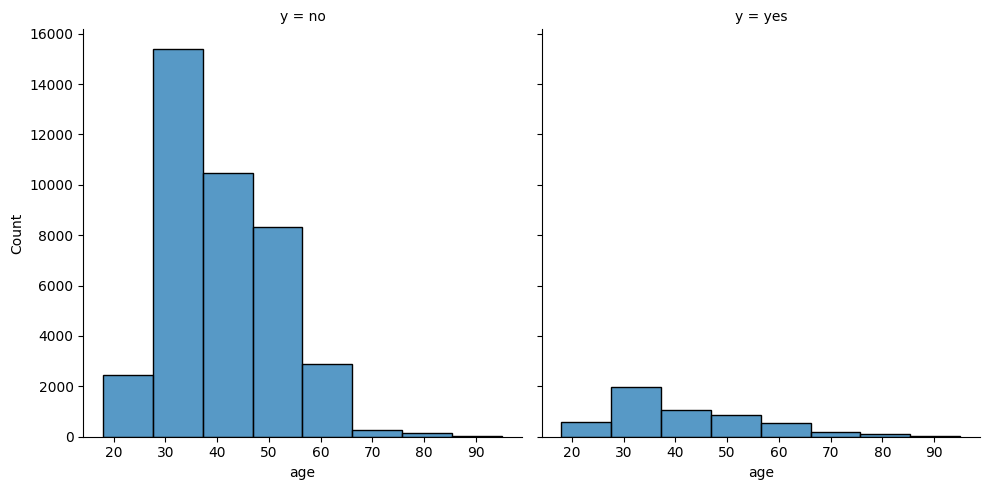

In [ ]:
# Age
sns.displot(df, x='age', col='y', binwidth = 10, height= 5)

In [ ]:
df['age_cut'] = pd.qcut(df['age'], 8)

In [ ]:
df.groupby(['age_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-12-7f3894cc1890>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_cut'], as_index=False)['Subscribed'].mean()


,age_cut,Subscribed
0,"(17.999, 30.0]",0.162873
1,"(30.0, 33.0]",0.105237
2,"(33.0, 36.0]",0.106927
3,"(36.0, 39.0]",0.098301
4,"(39.0, 43.0]",0.089127
5,"(43.0, 48.0]",0.091233
6,"(48.0, 55.0]",0.092239
7,"(55.0, 95.0]",0.184898


In [ ]:


# Assigning bins for the 'age' column
df.loc[df['age'] <= 30, 'age'] = 0
df.loc[(df['age'] > 30) & (df['age'] <= 33), 'age'] = 1
df.loc[(df['age'] > 33) & (df['age'] <= 36), 'age'] = 2
df.loc[(df['age'] > 36) & (df['age'] <= 39), 'age'] = 3
df.loc[(df['age'] > 39) & (df['age'] <= 43), 'age'] = 4
df.loc[(df['age'] > 43) & (df['age'] <= 48), 'age'] = 5
df.loc[(df['age'] > 48) & (df['age'] <= 55), 'age'] = 6
df.loc[(df['age'] > 55) & (df['age'] <= 95), 'age'] = 7
df.loc[df['age'] > 95, 'age']

,age


In [ ]:
# Job
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df.groupby(['job'], as_index=False)['Subscribed'].mean()

,job,Subscribed
0,admin.,0.122027
1,blue-collar,0.072750
2,entrepreneur,0.082717
3,housemaid,0.087903
4,management,0.137556
5,retired,0.227915
6,self-employed,0.118429
7,services,0.088830
8,student,0.286780
9,technician,0.110570


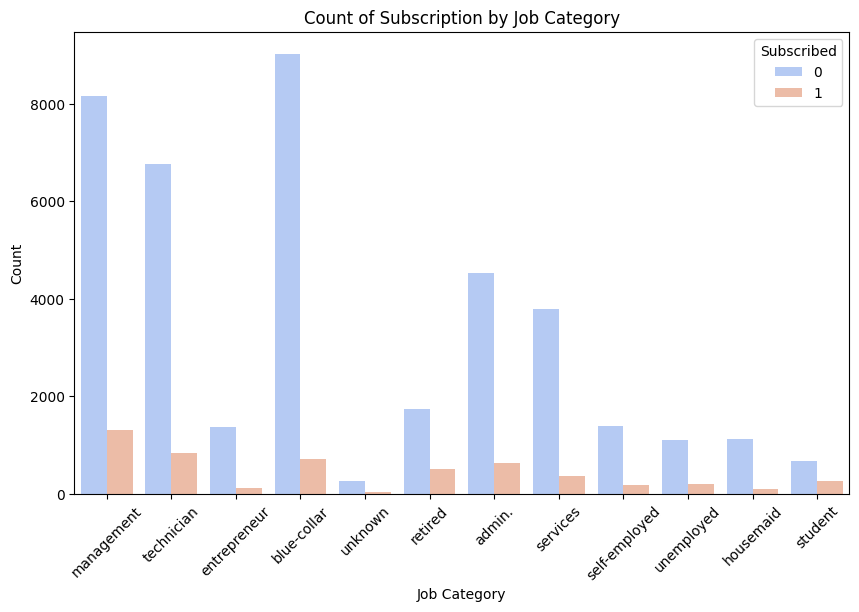

In [ ]:
# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the count plot using Seaborn
sns.countplot(x='job', hue='Subscribed', data=df, palette='coolwarm')

# Add labels and title
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.title('Count of Subscription by Job Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
job_mapping = {
    'unknown': 'miscellaneous',
    'technician': 'miscellaneous',
    'self-employed': 'miscellaneous',
    'management': 'management',
    'admin.': 'management',
    'blue-collar':'services',
    'entrepreneur':'services',
    'services':'services',
    'housemaid':'services',
    'retired':'retired',
    'student':'student',
    'unemployed':'unemployed'
}

In [ ]:
df['job_category'] = df['job'].map(job_mapping)

In [ ]:
df.groupby(['job_category'], as_index=False)['Subscribed'].mean()

,job_category,Subscribed
0,management,0.132066
1,miscellaneous,0.112109
2,retired,0.227915
3,services,0.078794
4,student,0.286780
5,unemployed,0.155027


Most likely to subscribe - students, retired

Less likely to subscribe - bue-collar, housemaid, entrepreneur, services

In [ ]:
df.groupby(['marital'], as_index=False)['Subscribed'].mean()

,marital,Subscribed
0,divorced,0.119455
1,married,0.101235
2,single,0.149492


In [ ]:
df.groupby(['education'], as_index=False)['Subscribed'].mean()

,education,Subscribed
0,primary,0.086265
1,secondary,0.105594
2,tertiary,0.150064
3,unknown,0.135703


1 - primary
2 - secondary
3 - unkown
4 - tertiary

In [ ]:
education_mapping = {
    'primary': 1,
    'secondary': 2,
    'unknown': 3,
    'tertiary': 4
}

In [ ]:
df['education_category'] = df['education'].map(education_mapping)

The likelihood of subscibing increases with the education level, unkown having the most likelihood of subscribing

In [ ]:
df.groupby(['default'], as_index=False)['Subscribed'].mean()

,default,Subscribed
0,no,0.117961
1,yes,0.063804


In [ ]:
# Balance
df['balance_cut'] = pd.qcut(df['balance'], 10)

In [ ]:
df.groupby(['balance_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-26-b9bdc25bdf17>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['balance_cut'], as_index=False)['Subscribed'].mean()


,balance_cut,Subscribed
0,"(-8019.001, 0.0]",0.068956
1,"(0.0, 22.0]",0.072194
2,"(22.0, 131.0]",0.091769
3,"(131.0, 272.0]",0.108282
4,"(272.0, 448.0]",0.114127
5,"(448.0, 701.0]",0.120080
6,"(701.0, 1126.0]",0.126823
7,"(1126.0, 1859.0]",0.142477
8,"(1859.0, 3574.0]",0.166114
9,"(3574.0, 102127.0]",0.161248


More balance more likely to subscribe

In [ ]:
df.loc[df['balance'] <= 0, 'balance'] = 0
df.loc[(df['balance'] > 0) & (df['balance'] <= 22), 'balance'] = 1
df.loc[(df['balance'] > 22) & (df['balance'] <= 131), 'balance'] = 2
df.loc[(df['balance'] > 131) & (df['balance'] <= 272), 'balance'] = 3
df.loc[(df['balance'] > 272) & (df['balance'] <= 448), 'balance'] = 4
df.loc[(df['balance'] > 448) & (df['balance'] <= 701), 'balance'] = 5
df.loc[(df['balance'] > 701) & (df['balance'] <= 1126), 'balance'] = 6
df.loc[(df['balance'] > 1126) & (df['balance'] <= 1859), 'balance'] = 7
df.loc[(df['balance'] > 1859) & (df['balance'] <= 3574), 'balance'] = 9
df.loc[(df['balance'] > 3574) & (df['balance'] <= 102127), 'balance'] = 8
df.loc[df['balance'] > 102127, 'balance']

,balance


In [ ]:
# Housing
df.groupby(['housing'], as_index=False)['Subscribed'].mean()

,housing,Subscribed
0,no,0.167024
1,yes,0.077000


In [ ]:
df.groupby(['loan'], as_index=False)['Subscribed'].mean()

,loan,Subscribed
0,no,0.126557
1,yes,0.066814


In [ ]:
df.groupby(['contact'], as_index=False)['Subscribed'].mean()

,contact,Subscribed
0,cellular,0.149189
1,telephone,0.134205
2,unknown,0.040707


In [ ]:
df['contact'] = df['contact'].replace('unknown', 'other')

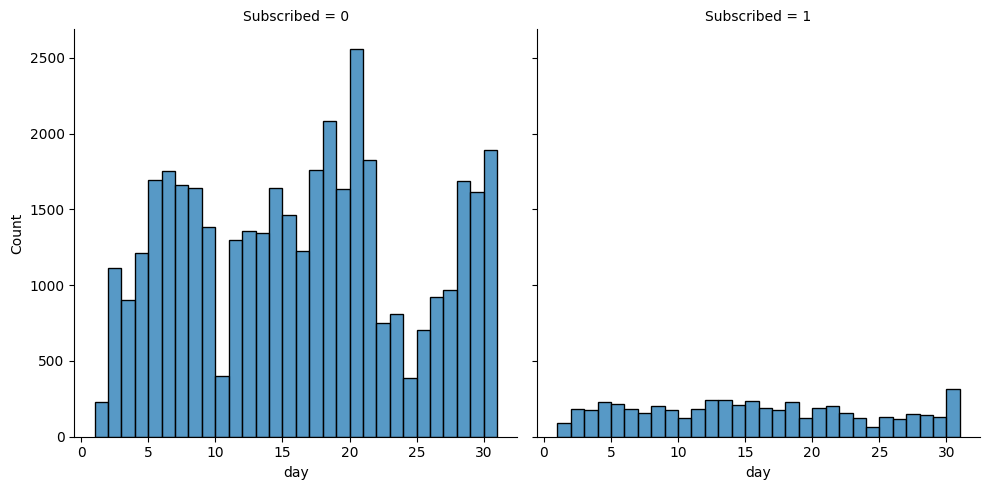

In [ ]:
# Day
sns.displot(df, x='day', col='Subscribed', binwidth = 1, height= 5)

In [ ]:
df['day_cut'] = pd.qcut(df['day'], 4)

In [ ]:
df.groupby(['day_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-34-eb57577f112b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['day_cut'], as_index=False)['Subscribed'].mean()


,day_cut,Subscribed
0,"(0.999, 8.0]",0.123196
1,"(8.0, 16.0]",0.137054
2,"(16.0, 21.0]",0.085235
3,"(21.0, 31.0]",0.120134


In [ ]:
df.loc[df['day'] <= 8.0, 'day'] = 1
df.loc[(df['day'] > 8.0) & (df['day'] <= 16), 'day'] = 2
df.loc[(df['day'] > 16) & (df['day'] <= 21), 'day'] = 3
df.loc[(df['day'] > 21) & (df['day'] <= 31), 'day'] = 4
df.loc[df['day'] > 31, 'day']

,day


The days are divided into 4 weeks,
1 -> is the first week
2 -> 2nd week
3 -> 3rd week
4 -> 4th week

In [ ]:
df.groupby(['month'], as_index=False)['Subscribed'].mean()

,month,Subscribed
0,apr,0.196794
1,aug,0.110133
2,dec,0.467290
3,feb,0.166478
4,jan,0.101212
5,jul,0.090935
6,jun,0.102228
7,mar,0.519916
8,may,0.067195
9,nov,0.101511


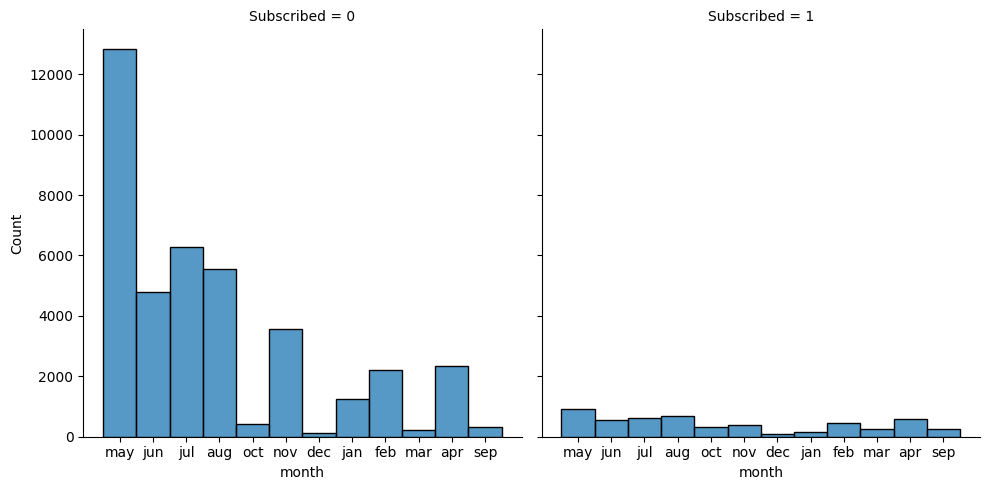

In [ ]:
sns.displot(df, x='month', col='Subscribed', binwidth=1, height=5)

Most subscription - sep, oct,  dec, mar

In [ ]:
# Duration
print(df['duration'].max())
print(df['duration'].min())

4918
0


In [ ]:
df['duration_cut'] = pd.qcut(df['duration'], 10)

In [ ]:
df.groupby(['duration_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-40-4988703e9237>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['duration_cut'], as_index=False)['Subscribed'].mean()


,duration_cut,Subscribed
0,"(-0.001, 58.0]",0.001987
1,"(58.0, 89.0]",0.012456
2,"(89.0, 117.0]",0.028476
3,"(117.0, 147.0]",0.045793
4,"(147.0, 180.0]",0.068060
5,"(180.0, 223.0]",0.090488
6,"(223.0, 280.0]",0.123312
7,"(280.0, 368.0]",0.137869
8,"(368.0, 548.0]",0.208527
9,"(548.0, 4918.0]",0.455413


In [ ]:
df.loc[df['duration'] <= 0, 'duration'] = 0
df.loc[(df['duration'] > 0) & (df['duration'] <= 22), 'duration'] = 1
df.loc[(df['duration'] > 22) & (df['duration'] <= 131), 'duration'] = 2
df.loc[(df['duration'] > 131) & (df['duration'] <= 272), 'duration'] = 3
df.loc[(df['duration'] > 272) & (df['duration'] <= 448), 'duration'] = 4
df.loc[(df['duration'] > 448) & (df['duration'] <= 701), 'duration'] = 5
df.loc[(df['duration'] > 701) & (df['duration'] <= 1126), 'duration'] = 6
df.loc[(df['duration'] > 1126) & (df['duration'] <= 1859), 'duration'] = 7
df.loc[(df['duration'] > 3574) & (df['duration'] <= 102127), 'duration'] = 8
df.loc[df['duration'] > 102127, 'duration']

,duration


Duration affects the likelihood of subscription according to the description

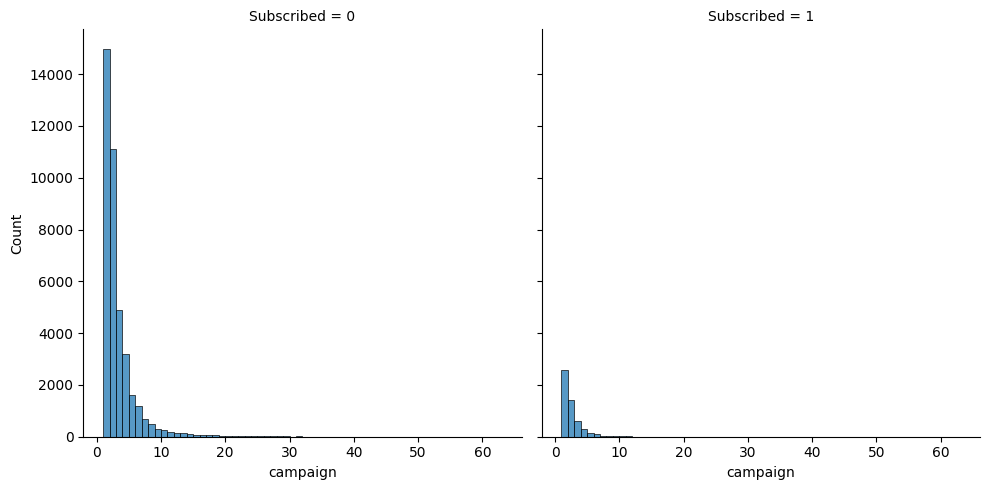

In [ ]:
# Campaign
sns.displot(df, x='campaign', col='Subscribed', binwidth=1, height=5)

In [ ]:
df['campaign_cut'] = pd.qcut(df['campaign'], 5, duplicates='drop')

In [ ]:
df.groupby(['campaign_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-44-1d29a5111047>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['campaign_cut'], as_index=False)['Subscribed'].mean()


,campaign_cut,Subscribed
0,"(0.999, 2.0]",0.131851
1,"(2.0, 4.0]",0.103395
2,"(4.0, 63.0]",0.064063


In [ ]:
df.loc[df['campaign'] <= 2.0, 'campaign'] = 0
df.loc[(df['campaign'] > 2.0) & (df['campaign'] <= 4), 'campaign'] = 1
df.loc[(df['campaign'] > 4) & (df['campaign'] <= 63), 'campaign'] = 2
df.loc[df['campaign'] > 63, 'campaign']

,campaign


Low Contact = 0, Moderate Contact = 1, High Contact = 2

In [ ]:
# Passed days (pdays)
df['pdays_cut'] = pd.qcut(df['pdays'], 10, duplicates= 'drop')

In [ ]:
df.groupby(['pdays_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-47-4e6fd00ccca5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['pdays_cut'], as_index=False)['Subscribed'].mean()


,pdays_cut,Subscribed
0,"(-1.001, 185.0]",0.113030
1,"(185.0, 871.0]",0.152802


In [ ]:
# Create a new column 'pdays_category' that categorizes the values
df['pdays_category'] = df['pdays'].apply(lambda x: 'Not Contacted' if x == -1 else 'Contacted')

In [ ]:
df.groupby('pdays_category', as_index=False)['Subscribed'].mean()

,pdays_category,Subscribed
0,Contacted,0.230713
1,Not Contacted,0.091573


In [ ]:
contacted_df = df[df['pdays_category'] == 'Contacted']
contacted_df['pdays_cut'] = pd.qcut(contacted_df['pdays'], 3, labels=["Recent contact", "Moderate contact", "Long ago contact"])

<ipython-input-50-4a6b846c6651>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contacted_df['pdays_cut'] = pd.qcut(contacted_df['pdays'], 3, labels=["Recent contact", "Moderate contact", "Long ago contact"])


In [ ]:
df['pdays_cut'] = df['pdays_cut'].astype('object')


In [ ]:
df.loc[df['pdays_category'] == 'Contacted', 'pdays_cut'] = contacted_df['pdays_cut'].values


In [ ]:
df.loc[df['pdays_category'] == 'Not Contacted', 'pdays_cut'] = 'Not Contacted'


In [ ]:
df['pdays'] = df['pdays_cut']


If not contacted 0, if contacted 1

In [ ]:
# Previous Contacted before this campaign
df['previous_cut'] = pd.qcut(df['previous'], 100, duplicates='drop')

In [ ]:
df.groupby(['previous_cut'], as_index=False)['Subscribed'].mean()

<ipython-input-56-4706861de8be>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['previous_cut'], as_index=False)['Subscribed'].mean()


,previous_cut,Subscribed
0,"(-0.001, 1.0]",0.099859
1,"(1.0, 2.0]",0.216524
2,"(2.0, 3.0]",0.257443
3,"(3.0, 4.0]",0.239496
4,"(4.0, 5.0]",0.263617
5,"(5.0, 6.0]",0.299639
6,"(6.0, 8.9]",0.278443
7,"(8.9, 275.0]",0.229581


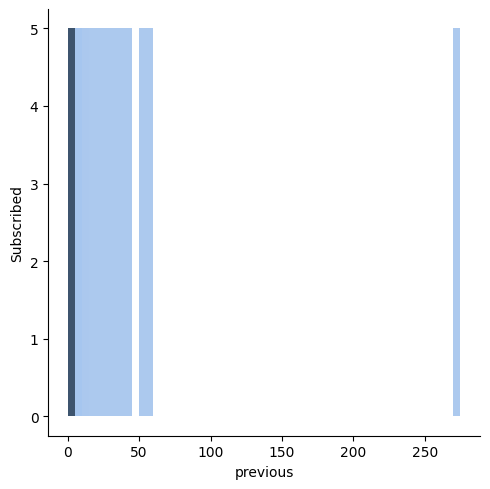

In [ ]:
sns.displot(df, x='previous', y='Subscribed', binwidth = 5, height= 5)

In [ ]:
df.loc[df['previous'] <= 1, 'previous'] = 0
df.loc[(df['previous'] > 1) & (df['previous'] <= 2), 'previous'] = 1
df.loc[(df['previous'] > 2) & (df['previous'] <= 3), 'previous'] = 2
df.loc[(df['previous'] > 3) & (df['previous'] <= 4), 'previous'] = 3
df.loc[(df['previous'] > 4) & (df['previous'] <= 5), 'previous'] = 4
df.loc[(df['previous'] > 5) & (df['previous'] <= 6), 'previous'] = 5
df.loc[(df['previous'] > 6) & (df['previous'] <= 8.9), 'previous'] = 6
df.loc[(df['previous'] > 8.9) & (df['previous'] <= 275), 'previous'] = 7
df.loc[df['previous'] > 275, 'previous']

,previous


In [ ]:
# Previous outcome of the marketing campaign (poutcome)
df.groupby(['poutcome'], as_index=False)['Subscribed'].mean()

,poutcome,Subscribed
0,failure,0.126097
1,other,0.166848
2,success,0.647253
3,unknown,0.091615


In [ ]:
df['poutcome'] = df['poutcome'].replace('unknown', 'unrecorded')

#### Data Cleaning

In [ ]:
df.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 45211 non-null  int64   
 1   job                 45211 non-null  object  
 2   marital             45211 non-null  object  
 3   education           45211 non-null  object  
 4   default             45211 non-null  object  
 5   balance             45211 non-null  int64   
 6   housing             45211 non-null  object  
 7   loan                45211 non-null  object  
 8   contact             45211 non-null  object  
 9   day                 45211 non-null  int64   
 10  month               45211 non-null  object  
 11  duration            45211 non-null  int64   
 12  campaign            45211 non-null  int64   
 13  pdays               45211 non-null  object  
 14  previous            45211 non-null  int64   
 15  poutcome            45211 non-null  

Dropping tables - day, campaign, previous

In [ ]:
ohe_cols = ['job_category','marital','education_category','default','housing','loan','contact','month','poutcome','pdays']


In [ ]:
ode_cols = ['education_category' ,'balance','duration']

In [ ]:
num_cols = ['age', 'duration', 'balance', 'campaign','previous', 'education_category', 'day']


In [ ]:
drop_cols = ['job','y','day_cut','age_cut','balance_cut','duration_cut','campaign_cut','pdays_cut','previous_cut','education','pdays_category']


In [ ]:
X = df.drop(columns=drop_cols+['Subscribed'])
y = df['Subscribed']

In [ ]:
X.head()

,age,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,job_category,education_category
0,7,married,no,9,yes,no,other,1,may,3,0,Not Contacted,0,unrecorded,management,4
1,5,single,no,2,yes,no,other,1,may,3,0,Not Contacted,0,unrecorded,miscellaneous,2
2,1,married,no,1,yes,yes,other,1,may,2,0,Not Contacted,0,unrecorded,services,2
3,5,married,no,7,yes,no,other,1,may,2,0,Not Contacted,0,unrecorded,services,3
4,1,single,no,1,no,no,other,1,may,3,0,Not Contacted,0,unrecorded,miscellaneous,3


In [ ]:
y = y.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

#### Pipeline

In [ ]:
# Ordinal Pipeline
ode_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=-1))
])

In [ ]:
# One hot Encoder Pipeline
ohe_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False, dtype=float))
])

In [ ]:
# Num Pipeline
num_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

In [ ]:
cols_trans = ColumnTransformer(transformers = [
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols)
],
                               remainder = 'drop',
                               n_jobs = -1
                               )

Smote

In [ ]:
smote = SMOTE(random_state=28)

Random Forest

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
param_grid_rfc = {
    'n_estimators': [200, 300, 500],
    'min_samples_split': [20, 25, 30],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [2, 3, 5],
    'criterion': ['entropy', 'gini']
}

In [ ]:
rfc_cv = GridSearchCV(rfc, param_grid_rfc, cv=3, n_jobs=-1 )

In [ ]:
rfc_pipe = make_pipeline(cols_trans, rfc_cv)

In [ ]:
#smoting results
rfc_pipe_smote = ImbPipeline(steps = [
    ('cols_trans', cols_trans),
    ('smote', smote),
    ('rfc', rfc_cv)
])

In [ ]:
rfc_pipe_smote.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Pipeline(steps=[('cols_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'duration', 'balance',
                                                   'campaign', 'previous',
                                                   'education_category',
                                                   'day']),
                                                 ('ode_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_...
                                                   'education_category',
                                                   'default', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome', 'pdays'])])),
                ('smote', SMOTE(random_state=28)),
                ('rfc',
                 GridSearchCV(cv=3, estimator=RandomForestClassifier(),
                              n_jobs=-1,
                              param_grid={'criterion': ['entropy', 'gini'],
                                          'max_depth': [10, 15, 20],
                                          'min_samples_leaf': [2, 3, 5],
                                          'min_samples_split': [20, 25, 30],
                                          'n_estimators': [200, 300, 500]}))])

In [ ]:
rfc_test_smote_score = rfc_pipe_smote.score(X_test, y_test)
rfc_train_smote_score = rfc_pipe_smote.score(X_train, y_train)

In [ ]:
print(f"Random Forest (with balanced dataset)  - Trainig Accuracy : {rfc_train_smote_score}")
print(f"Random Forest (with balanced dataset) - Test Accuracy : {rfc_test_smote_score}")

Random Forest (with balanced dataset)  - Trainig Accuracy : 0.9265372705153727
Random Forest (with balanced dataset) - Test Accuracy : 0.8967156916952339


In [ ]:
rfc_best_params = rfc_pipe_smote.named_steps['rfc'].best_params_
rfc_best_params

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'n_estimators': 500}

In [ ]:
y_pred_rfc = rfc_pipe_smote.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rfc, target_names=['Non-Subscription (Majority)', 'Subscription (Minority)']))

                             precision    recall  f1-score   support

Non-Subscription (Majority)       0.95      0.93      0.94      7993
    Subscription (Minority)       0.55      0.62      0.58      1050

                   accuracy                           0.90      9043
                  macro avg       0.75      0.78      0.76      9043
               weighted avg       0.90      0.90      0.90      9043



In [ ]:
confusion_matrix(y_test, y_pred_rfc)

array([[7458,  535],
       [ 399,  651]])

In [ ]:
joblib.dump(rfc_pipe_smote, 'rfc_pipe_smote.joblib')

['rfc_pipe_smote.joblib']

Neural Network

In [ ]:
nn = MLPClassifier()

In [ ]:
param_grid_nn = {
    'hidden_layer_sizes': [(30, 30), (50,), (30,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.01, 0.1, 0.5, 1.0],
    'batch_size': [64, 128],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
    'max_iter': [200, 300],
    'early_stopping': [True]
}

In [ ]:
nn_cv = GridSearchCV(nn, param_grid_nn, cv=3, n_jobs=-1)

In [ ]:
# Using smote
nn_pipe_smote = ImbPipeline(steps = [
    ('cols_trans', cols_trans),
    ('smote', smote),
    ('nn', nn_cv)
])

In [ ]:
nn_pipe_smote.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Pipeline(steps=[('cols_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'duration', 'balance',
                                                   'campaign', 'previous',
                                                   'education_category',
                                                   'day']),
                                                 ('ode_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_...
                                                   'poutcome', 'pdays'])])),
                ('smote', SMOTE(random_state=28)),
                ('nn',
                 GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
                              param_grid={'activation': ['tanh', 'relu'],
                                          'alpha': [0.01, 0.1, 0.5, 1.0],
                                          'batch_size': [64, 128],
                                          'early_stopping': [True],
                                          'hidden_layer_sizes': [(30, 30),
                                                                 (50,), (30,)],
                                          'learning_rate': ['constant',
                                                            'adaptive',
                                                            'invscaling'],
                                          'max_iter': [200, 300],
                                          'solver': ['adam']}))])

In [ ]:
nn_train_smote_score = nn_pipe_smote.score(X_train, y_train)
nn_test_smote_score = nn_pipe_smote.score(X_test, y_test)

In [ ]:
print(f"Neural Network (with balanced dataset)  - Trainig Accuracy : {nn_train_smote_score}")
print(f"Neural Network (with balanced dataset) - Test Accuracy : {nn_test_smote_score}")

Neural Network (with balanced dataset)  - Trainig Accuracy : 0.8876631276266312
Neural Network (with balanced dataset) - Test Accuracy : 0.8710604887758487


In [ ]:
nn_best_params = nn_pipe_smote.named_steps['nn'].best_params_
nn_best_params

{'activation': 'tanh',
 'alpha': 0.01,
 'batch_size': 128,
 'early_stopping': True,
 'hidden_layer_sizes': (50,),
 'learning_rate': 'adaptive',
 'max_iter': 300,
 'solver': 'adam'}

In [ ]:
y_pred_nn = nn_pipe_smote.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_nn, target_names=['Non-Subscription (Majority)', 'Subscription (Minority)']))

                             precision    recall  f1-score   support

Non-Subscription (Majority)       0.97      0.88      0.92      7993
    Subscription (Minority)       0.47      0.77      0.58      1050

                   accuracy                           0.87      9043
                  macro avg       0.72      0.83      0.75      9043
               weighted avg       0.91      0.87      0.88      9043



In [ ]:
confusion_matrix(y_test, y_pred_nn)

array([[7070,  923],
       [ 243,  807]])

In [ ]:
joblib.dump(nn_pipe_smote, 'nn_pipe_smote.joblib')

['nn_pipe_smote.joblib']

Voting Classifier

In [ ]:
params_rfc = {
    'criterion': 'gini',
    'max_depth': 20,
    'min_samples_leaf': 2,
    'min_samples_split': 20,
    'n_estimators': 500
}

In [ ]:
rfc_vc = RandomForestClassifier(**params_rfc)

In [ ]:
rfc_vc_pipe = make_pipeline(cols_trans, rfc_vc)

In [ ]:
params_nn = {'activation': 'tanh',
 'alpha': 0.01,
 'batch_size': 128,
 'early_stopping': True,
 'hidden_layer_sizes': (50,),
 'learning_rate': 'adaptive',
 'max_iter': 300,
 'solver': 'adam'}

In [ ]:
nn_vc = MLPClassifier(**params_nn)

In [ ]:
nn_vc_pipe = make_pipeline(cols_trans, nn_vc)

In [ ]:
param_grid_vc = {
    'voting': ['soft','hard'],
    'weights': [(1, 1), (1, 2), (2, 1)]
}

In [ ]:
vc = VotingClassifier(estimators=[('rfc', rfc_vc_pipe), ('nn', nn_vc_pipe)])


In [ ]:
vc_cv = GridSearchCV(vc, param_grid_vc, cv=3, scoring='accuracy', n_jobs=-1)

In [ ]:
vc_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('rfc',
                                                     Pipeline(steps=[('columntransformer',
                                                                      ColumnTransformer(n_jobs=-1,
                                                                                        transformers=[('num_p',
                                                                                                       Pipeline(steps=[('impute',
                                                                                                                        SimpleImputer()),
                                                                                                                       ('scale',
                                                                                                                        StandardScaler())]),
                                                                                                       ['age',
                                                                                                        'duration',
                                                                                                        'balance',
                                                                                                        'campaign',
                                                                                                        'previous',
                                                                                                        'education_category',
                                                                                                        'day']),
                                                                                                      ('ode_p',
                                                                                                       Pipeline(steps=[('impute',
                                                                                                                        SimpleImpute...
                                                                                                        'education_category',
                                                                                                        'default',
                                                                                                        'housing',
                                                                                                        'loan',
                                                                                                        'contact',
                                                                                                        'month',
                                                                                                        'poutcome',
                                                                                                        'pdays'])])),
                                                                     ('mlpclassifier',
                                                                      MLPClassifier(activation='tanh',
                                                                                    alpha=0.01,
                                                                                    batch_size=128,
                                                                                    early_stopping=True,
                                                                                    hidden_layer_sizes=(50,),
                                                                                    learning_rate='adaptive',
                                                                                    max_iter=300))]))]),
             n_jobs=-1,
             param_grid={'voting': ['soft', 'hard'],
                         'weights': [(1, 1), (1, 2), (2, 1)]},
    

In [ ]:
vc_smote_train_score = vc_cv.score(X_train, y_train)
vc_smote_test_score = vc_cv.score(X_test, y_test)

In [ ]:
print(f"Voting Classifier (with balanced dataset)  - Trainig Accuracy : {vc_smote_train_score}")
print(f"Voting Classifier (with balanced dataset) - Test Accuracy : {vc_smote_test_score}")

Voting Classifier (with balanced dataset)  - Trainig Accuracy : 0.9165837204158372
Voting Classifier (with balanced dataset) - Test Accuracy : 0.9063363927900033


In [ ]:
y_pred_vc = vc_cv.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_vc, target_names=['Non-Subscription (Majority)', 'Subscription (Minority)']))

                             precision    recall  f1-score   support

Non-Subscription (Majority)       0.93      0.97      0.95      7993
    Subscription (Minority)       0.64      0.44      0.52      1050

                   accuracy                           0.91      9043
                  macro avg       0.79      0.70      0.73      9043
               weighted avg       0.90      0.91      0.90      9043



In [ ]:
confusion_matrix(y_test, y_pred_vc)

array([[7739,  254],
       [ 593,  457]])

Gradient Boosting Random Forest

In [ ]:
params_rfc = {'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'n_estimators': 500}

In [ ]:
params_nn ={'activation': 'tanh',
 'alpha': 0.01,
 'batch_size': 128,
 'early_stopping': True,
 'hidden_layer_sizes': (50,),
 'learning_rate': 'adaptive',
 'max_iter': 300,
 'solver': 'adam'}

In [ ]:
params_gb = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 6
}


In [ ]:
rfc_boost = RandomForestClassifier(**params_rfc)

In [ ]:
nn_boost = MLPClassifier(**params_nn)

Gradient boosting for Random Forest

In [ ]:
rfc_gb_pipe = ImbPipeline(steps=[
    ('cols_trans', cols_trans),  # Your column transformer here
    ('smote', smote),
    ('voting', VotingClassifier(
        estimators=[('rfc', rfc_boost), ('gb', gb_model)],
        voting='soft'  # 'soft' uses predicted probabilities
    ))
])

In [ ]:
rfc_gb_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Pipeline(steps=[('cols_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'duration', 'balance',
                                                   'campaign', 'previous',
                                                   'education_category',
                                                   'day']),
                                                 ('ode_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_...
                                                  ['job_category', 'marital',
                                                   'education_category',
                                                   'default', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome', 'pdays'])])),
                ('smote', SMOTE(random_state=28)),
                ('voting',
                 VotingClassifier(estimators=[('rfc',
                                               RandomForestClassifier(max_depth=20,
                                                                      min_samples_leaf=2,
                                                                      min_samples_split=20,
                                                                      n_estimators=500)),
                                              ('gb',
                                               GradientBoostingClassifier(max_depth=6))],
                                  voting='soft'))])

In [ ]:
y_pred_rfc = rfc_gb_pipe.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rfc,target_names=['Non-Subscription (Majority)', 'Subscription (Minority)']))

                             precision    recall  f1-score   support

Non-Subscription (Majority)       0.95      0.94      0.94      7993
    Subscription (Minority)       0.57      0.61      0.59      1050

                   accuracy                           0.90      9043
                  macro avg       0.76      0.77      0.77      9043
               weighted avg       0.90      0.90      0.90      9043



In [ ]:
train_accuracy_rfc = rfc_gb_pipe.score(X_train, y_train)
test_accuracy_rfc = rfc_gb_pipe.score(X_test, y_test)

In [ ]:
print(f"Training Accuracy: {train_accuracy_rfc}")
print(f"Test Accuracy: {test_accuracy_rfc}")

Training Accuracy: 0.9241871267418713
Test Accuracy: 0.902134247484242


Gradient boosting for Neural Network

In [ ]:
gb_model = GradientBoostingClassifier(**params_gb)

In [ ]:
nn_gb_pipe = ImbPipeline(steps=[
    ('cols_trans', cols_trans),  # Your column transformer here
    ('smote', smote),
    ('voting', VotingClassifier(
        estimators=[('nn', nn_boost), ('gb', gb_model)],
        voting='soft'  # 'soft' uses predicted probabilities
    ))
])

In [ ]:
nn_gb_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Pipeline(steps=[('cols_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'duration', 'balance',
                                                   'campaign', 'previous',
                                                   'education_category',
                                                   'day']),
                                                 ('ode_p',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_...
                                                   'default', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome', 'pdays'])])),
                ('smote', SMOTE(random_state=28)),
                ('voting',
                 VotingClassifier(estimators=[('nn',
                                               MLPClassifier(activation='tanh',
                                                             alpha=0.01,
                                                             batch_size=128,
                                                             early_stopping=True,
                                                             hidden_layer_sizes=(50,),
                                                             learning_rate='adaptive',
                                                             max_iter=300)),
                                              ('gb',
                                               GradientBoostingClassifier(max_depth=6))],
                                  voting='soft'))])

In [ ]:
y_pred_nn = nn_gb_pipe.predict(X_test)
print(classification_report(y_test, y_pred_nn,target_names=['Non-Subscription (Majority)', 'Subscription (Minority)']))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7993
           1       0.54      0.67      0.60      1050

    accuracy                           0.90      9043
   macro avg       0.75      0.80      0.77      9043
weighted avg       0.91      0.90      0.90      9043



In [ ]:
train_accuracy_nn = nn_gb_pipe.score(X_train, y_train)
test_accuracy_nn = nn_gb_pipe.score(X_test, y_test)

In [ ]:
print(f"Training Accuracy: {train_accuracy_nn}")
print(f"Test Accuracy: {test_accuracy_nn}")

Training Accuracy: 0.9128511391285113
Test Accuracy: 0.8964945261528254
